# Q1

## Importing needed libraries:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Reading the image:

In [2]:
image_path = 'embedded_squares.JPG'

image_read = mpimg.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(np.array(image_read), cv2.COLOR_BGR2GRAY)

In [5]:
image_color_range = 256

# Padding the image for neighborhood processing of edge pixels
padded_image = cv2.copyMakeBorder(img, 1, 1, 1, 1, borderType=cv2.BORDER_REPLICATE)

# Initializing the result image
after_image = np.zeros(img.shape)

# For all the source image pixels
for row_index in range(len(img)):
    for col_index in range(len(img[row_index])):
        # Calculate neighborhood intensities
        neighborhood = [padded_image[row_index + neighbor_row + 1][col_index + neighbor_col + 1]
                        for neighbor_row in range(-1, 2)
                        for neighbor_col in range(-1, 2)]
        neighborhood_freq = np.zeros(image_color_range)

        # Calculating neighborhood intensity frequency
        for neighbor in neighborhood:
            neighborhood_freq[neighbor] = neighborhood_freq[neighbor] + 1

        # Calculating the current pixel new intensity value by the transformation:
        # s_k = ((L - 1) / MN) * Σn_j
        # L = 256, MN = neighborhood size = 3X3 = 9
        after_image[row_index - 1][col_index - 1] = \
            sum([((image_color_range - 1) / 9) * neighborhood_freq[intensity]
                 for intensity in neighborhood])

## Presenting the results:

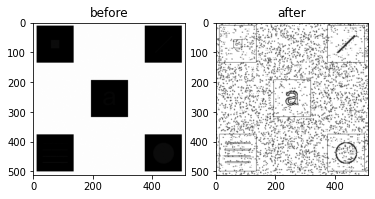

In [4]:
fig, (before_plot, after_filter_plot) = plt.subplots(1, 2)

before_plot.set_title('before')
after_filter_plot.set_title('after')
before_plot.imshow(img, cmap='gray')

after_filter_plot.imshow(after_image, cmap='gray')

plt.show()